In [1]:
# use timm to extract feature from alexnet and vit models
# print the features



In [72]:
from urllib.request import urlopen
from PIL import Image
import timm
import matplotlib.pyplot as plt

img = Image.open(urlopen(
    'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
))

model = timm.create_model(
    'vit_base_patch16_224.augreg2_in21k_ft_in1k',
    pretrained=True,
    num_classes=0,  # remove classifier nn.Linear
)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)


torch.Size([196, 768])
torch.Size([196])


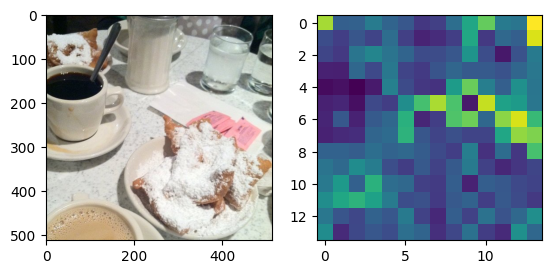

In [73]:
output = model(transforms(img).unsqueeze(0))  # output is (batch_size, num_features) shaped tensor

# or equivalently (without needing to set num_classes=0)

output_feat = model.forward_features(transforms(img).unsqueeze(0))
# output is unpooled, a (1, 197, 768) shaped tensor

output = model.forward_head(output_feat, pre_logits=True)
# output is a (1, num_features) shaped tensor

# plot image
plt.subplot(1, 2, 1)
plt.imshow(img)
# plt.axis('off')

# convert output_feat 1x197x768 to 196 exclusing cls token
output_feat = output_feat[:, 1:].reshape(196, 768)
print(output_feat.shape)

# pool the features
output_feat = output_feat.mean(dim=1)

print(output_feat.shape)

# plot the output_feat 14x14 grid
plt.subplot(1, 2, 2)
plt.imshow(output_feat.reshape(14, 14).detach().numpy())
# plt.axis('off')
plt.show()

12


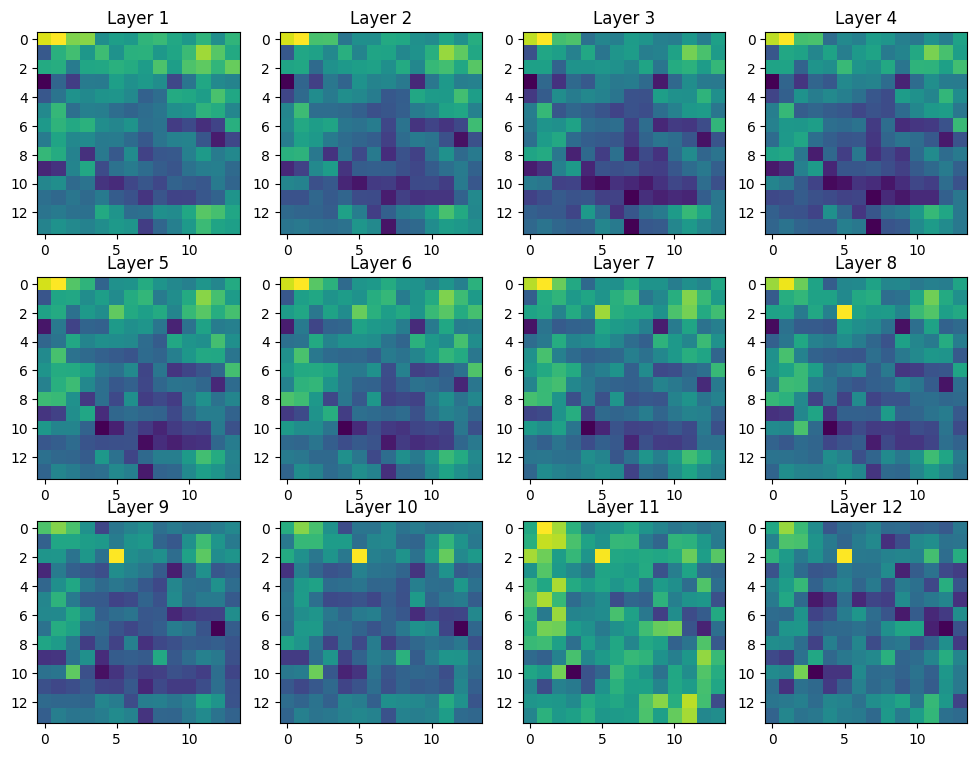

In [75]:
# get intermediate features using forward_features
output_feat = model.forward_intermediates(transforms(img).unsqueeze(0))
print(len(output_feat[1]))

# # plot the intermediate features
# for feat in output_feat[1]:
#     # plot 14x14 grid, taking the mean of the 768 features
#     plt.imshow(feat.mean(dim=1).reshape(14, 14).detach().numpy())
#     plt.show()
    
# make 3x4 grid of intermediate features
plt.figure(figsize=(12, 9))
for i, feat in enumerate(output_feat[1]):
    plt.subplot(3, 4, i+1)
    plt.imshow(feat.mean(dim=1).reshape(14, 14).detach().numpy())
    plt.title(f'Layer {i+1}')
    # plt.axis('off')
plt.show()

In [68]:
from urllib.request import urlopen
from PIL import Image
import timm

img = Image.open(urlopen(
    'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
))

model = timm.create_model(
    'vgg16.tv_in1k',
    pretrained=True,
    features_only=True,
)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

output = model(transforms(img).unsqueeze(0))  # unsqueeze single image into batch of 1

for o in output:
    # print shape of each feature map in output
    # e.g.:
    #  torch.Size([1, 64, 224, 224])
    #  torch.Size([1, 128, 112, 112])
    #  torch.Size([1, 256, 56, 56])
    #  torch.Size([1, 512, 28, 28])
    #  torch.Size([1, 512, 14, 14])
    #  torch.Size([1, 512, 7, 7])

    print(o.shape)


torch.Size([1, 64, 224, 224])
torch.Size([1, 128, 112, 112])
torch.Size([1, 256, 56, 56])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


torch.Size([1, 4096])